In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

$\frac{du}{dt} = \frac{d^2 u}{dx^2}, ~~u(x, 0) = x^2, ~~u(0, t) = t, ~~u(1, t) = 2 - exp(-t), 0 \le x \le 1$

In [31]:
def phi(x):
    return x ** 2

def psi1(t):
    return t

def psi2(t):
    return 2 - np.exp(-t)

In [37]:
N_x = 10
N_t = 100
h = 1/N_x
k = 1/N_t
r = k/(h*h)
time_steps = 50
time = np.arange(0,(time_steps+.5)*k,k)
x = np.arange(0,1.0001,h)
X, T = np.meshgrid(x, time)

In [38]:
w=np.zeros((time_steps+1, N_x+1))
b=np.zeros(N_x-1)
for i in range (1, N_x):
    w[0, i] = phi(x[i])
    
    
for j in range (0,time_steps+1):
    w[j, 0] = psi1(time[j])
    w[j, N_x] = psi2(time[j])

In [39]:
A=np.zeros((N_x-1,N_x-1))
B=np.zeros((N_x-1,N_x-1))
for i in range (0,N_x-1):
    A[i,i]=2+2*r
    B[i,i]=2-2*r

for i in range (0,N_x-2):           
    A[i+1,i]=-r
    A[i,i+1]=-r
    B[i+1,i]=r
    B[i,i+1]=r
    
Ainv=np.linalg.inv(A)   

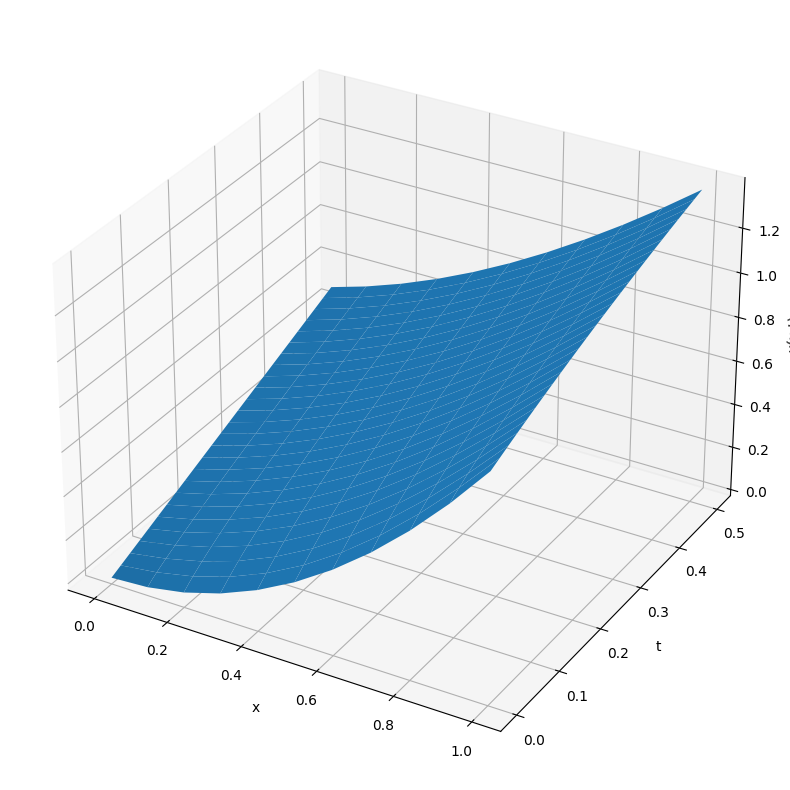

In [40]:
for j in range (1,time_steps+1):
    b[0]=r*w[j-1, 0]+r*w[j, 0]
    b[N_x-2]=r*w[j-1, N_x]+r*w[j, N_x]
    v=np.dot(B,w[j-1, 1:(N_x)])
    w[j, 1:(N_x)]=np.dot(Ainv,v+b)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, w)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()

In [36]:

h = 0.025
k = 0.025
r = k/h**2

time = np.arange(0,0.5+k,k)
x = np.arange(0,1.0+h,h)

time_steps = len(time)
N_x = len(x)
X, T = np.meshgrid(x, time)

w=np.zeros((N_x, time_steps))
w[:, 0] = phi(x)
w[0, :] = psi1(time)
w[-1, :] = psi2(time)

for j in range(1, time_steps):
    for i in range(1, N_x-1):
        w[i, j] = r * w[i-1, j-1] + (1 - 2*r)*w[i, j-1] + r * w[i+1, j-1]

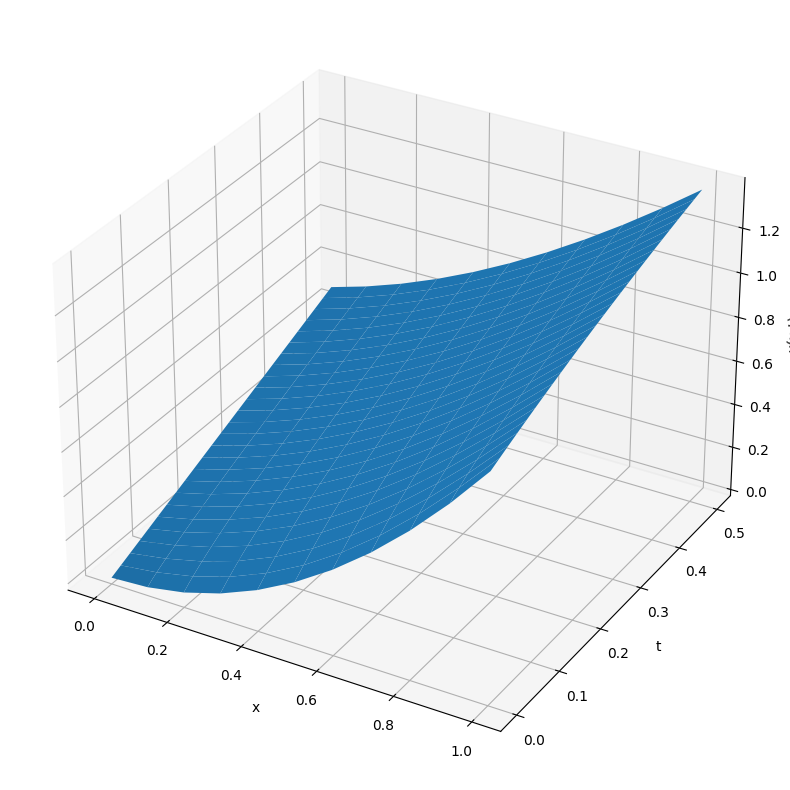

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, w)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()